# Programming for Data Analytics Project 2020
***



In this project I simulate soccer results modelled I model and synthesise real-world data using Python's `numpy.random` package. 

I have chosen to simulate

Specifically, in this project you should:
•
•Investigate  the  types  of  variables  involved,  their  likely  distributions,  and  theirrelationships with each other.
•Synthesise/simulate a data set as closely matching their properties as possible.
•Detail your research and implement the simulation in a Jupyter notebook – thedata set itself can simply be displayed in an output cell within the notebook.

Grades = result
hours study = possession
logins = goals per game
previous study = days since last match?

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("pl_stats.csv.html")

In [27]:
df.describe()

,timestamp,attendance,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,...,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
count,3.800000e+02,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.546145e+09,38186.847368,19.500000,1.480895,1.167632,1.615500,1.198000,1.568421,1.252632,2.821053,...,3.354763,3.219421,4.471316,5.381816,1.261000,1.821474,3.101158,5.897763,1.842316,1.908868
std,6.877351e+06,16720.334767,10.980313,0.831446,0.761209,0.590587,0.534085,1.312836,1.180031,1.601312,...,1.169849,2.962683,1.906924,5.540953,0.107498,0.312900,0.833400,2.032061,0.214528,0.228041
min,1.533928e+09,9980.000000,1.000000,0.000000,0.000000,0.470000,0.260000,0.000000,0.000000,0.000000,...,0.000000,1.070000,2.900000,1.120000,1.050000,1.200000,1.540000,2.300000,1.430000,1.380000
25%,1.540656e+09,25034.750000,10.000000,1.000000,0.630000,1.210000,0.840000,1.000000,0.000000,2.000000,...,2.922500,1.570000,3.350000,2.300000,1.180000,1.585000,2.450000,4.437500,1.690000,1.740000
50%,1.546018e+09,31948.000000,19.500000,1.470000,1.075000,1.475000,1.160000,1.000000,1.000000,3.000000,...,3.500000,2.300000,3.750000,3.350000,1.250000,1.770000,2.950000,5.500000,1.830000,1.890000
75%,1.551541e+09,53282.750000,29.000000,2.062500,1.610000,1.917500,1.542500,2.000000,2.000000,4.000000,...,4.000000,3.350000,4.850000,6.312500,1.330000,2.000000,3.600000,7.050000,1.962500,2.050000
max,1.557670e+09,81332.000000,38.000000,3.000000,3.000000,2.840000,2.320000,6.000000,6.000000,8.000000,...,8.000000,22.000000,15.750000,42.750000,1.570000,2.750000,5.650000,15.000000,2.800000,2.550000


In [4]:
df

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.00,0.00,...,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.00,0.00,...,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.00,0.00,...,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.00,0.00,...,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.00,0.00,...,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1557669600,May 12 2019 - 2:00pm,complete,53331,Liverpool,Wolverhampton Wanderers,Martin Atkinson,38,2.78,1.28,...,1.32,5.80,9.00,1.18,1.57,2.45,4.75,1.95,1.83,Anfield (Liverpool)
376,1557669600,May 12 2019 - 2:00pm,complete,74457,Manchester United,Cardiff City,Jonathan Moss,38,2.00,0.61,...,1.28,6.20,10.00,1.12,1.41,2.00,3.60,1.74,2.05,Old Trafford (Manchester)
377,1557669600,May 12 2019 - 2:00pm,complete,30367,Southampton,Huddersfield Town,Lee Probert,38,1.22,0.33,...,1.41,4.90,7.50,1.19,1.61,2.50,4.75,1.80,2.00,St. Mary's Stadium (Southampton- Hampshire)
378,1557669600,May 12 2019 - 2:00pm,complete,60124,Tottenham Hotspur,Everton,Andre Marriner,38,2.06,1.06,...,2.10,3.50,3.55,1.22,1.71,2.80,6.00,1.59,2.30,Tottenham Hotspur Stadium (London)


In [49]:
list(df.columns)

['timestamp',
 'date_GMT',
 'status',
 'attendance',
 'home_team_name',
 'away_team_name',
 'referee',
 'Game Week',
 'Pre-Match PPG (Home)',
 'Pre-Match PPG (Away)',
 'home_ppg',
 'away_ppg',
 'home_team_goal_count',
 'away_team_goal_count',
 'total_goal_count',
 'total_goals_at_half_time',
 'home_team_goal_count_half_time',
 'away_team_goal_count_half_time',
 'home_team_goal_timings',
 'away_team_goal_timings',
 'home_team_corner_count',
 'away_team_corner_count',
 'home_team_yellow_cards',
 'home_team_red_cards',
 'away_team_yellow_cards',
 'away_team_red_cards',
 'home_team_first_half_cards',
 'home_team_second_half_cards',
 'away_team_first_half_cards',
 'away_team_second_half_cards',
 'home_team_shots',
 'away_team_shots',
 'home_team_shots_on_target',
 'away_team_shots_on_target',
 'home_team_shots_off_target',
 'away_team_shots_off_target',
 'home_team_fouls',
 'away_team_fouls',
 'home_team_possession',
 'away_team_possession',
 'team_a_xg',
 'team_b_xg',
 'average_goals_per_m

In [18]:
df["home_team_possession"]

0      46
1      40
2      62
3      66
4      37
       ..
375    59
376    73
377    53
378    55
379    48
Name: home_team_possession, Length: 380, dtype: int64

In [19]:
df["home_team_goal_count"]

0      2
1      1
2      2
3      0
4      0
      ..
375    2
376    0
377    1
378    2
379    1
Name: home_team_goal_count, Length: 380, dtype: int64

In [54]:
df1 = df[["away_team_goal_count", "home_team_goal_count", "home_team_possession", "away_team_possession"]]

In [55]:
df1

,away_team_goal_count,home_team_goal_count,home_team_possession,away_team_possession
0,1,2,46,54
1,2,1,40,60
2,0,2,62,38
3,2,0,66,34
4,3,0,37,63
...,...,...,...,...
375,0,2,59,41
376,2,0,73,27
377,1,1,53,47
378,2,2,55,45


In [56]:
df1['home_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'w', 'l/d')  #create new column in df1 to check if prices match
df1

<ipython-input-56-8193d6b39033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['home_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'w', 'l/d')  #create new column in df1 to check if prices match


,away_team_goal_count,home_team_goal_count,home_team_possession,away_team_possession,home_result
0,1,2,46,54,w
1,2,1,40,60,l/d
2,0,2,62,38,w
3,2,0,66,34,l/d
4,3,0,37,63,l/d
...,...,...,...,...,...
375,0,2,59,41,w
376,2,0,73,27,l/d
377,1,1,53,47,l/d
378,2,2,55,45,l/d


In [57]:
df1['home_team_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'W', 
         (np.where(df1['away_team_goal_count'] == df1['home_team_goal_count'], 'D', 'L')))
df1

<ipython-input-57-ceac1229100d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['home_team_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'W',


,away_team_goal_count,home_team_goal_count,home_team_possession,away_team_possession,home_result,home_team_result
0,1,2,46,54,w,W
1,2,1,40,60,l/d,L
2,0,2,62,38,w,W
3,2,0,66,34,l/d,L
4,3,0,37,63,l/d,L
...,...,...,...,...,...,...
375,0,2,59,41,w,W
376,2,0,73,27,l/d,L
377,1,1,53,47,l/d,D
378,2,2,55,45,l/d,D


In [58]:
del df1["home_result"]

In [68]:
df1

,home_team_goal_count,home_team_possession,home_team_result,home_team_shots,away_team_shots
0,2,46,W,8,8
1,1,40,L,11,13
2,2,62,W,11,7
3,0,66,L,11,11
4,0,37,L,6,8
...,...,...,...,...,...
375,2,59,W,11,7
376,0,73,L,21,11
377,1,53,D,7,8
378,2,55,D,9,13


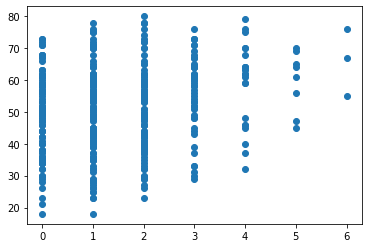

In [74]:
plt.scatter(htgc, df1["home_team_possession"])

In [69]:
htgc = df1["home_team_goal_count"]

In [70]:
htr = df1["home_team_result"]

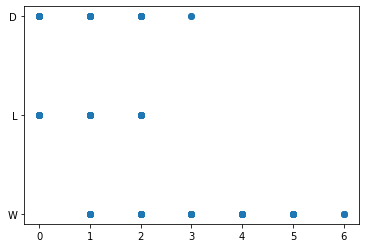

In [72]:
plt.scatter(htgc, htr)

In [ ]:
def counts()